# Investigation of double derivative apparant convergence fail

It can look like `DDX(DDX(f))` fails to converge for the same functions where `D2DX2(f)` shows convergence. It has been found that the reson for this is that `DDX(f)` is multivalued at $\rho=0$, which gives problems when ghost points are being set on the inner $\rho$ "boundary.

This notebooks shows that the convergence of `DDX(DDX(f))` is indeed second order.

In [1]:
from IPython.display import display
from sympy import init_printing
from sympy import symbols, together, as_finite_diff, simplify
from sympy import Function, Eq, S

init_printing()

In [2]:
x = symbols('x')
h = symbols('h', positive=True)

f = Function('f')
g = Function('g')

# Stencils
stencil = [x-h, x, x+h]

### Calculate the finite difference approximation of $\partial_x f$

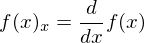

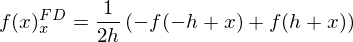

In [3]:
fx = f(x).diff(x)
fxFD = as_finite_diff(fx, stencil)
display(Eq(symbols('f(x)_x'), fx))
display(Eq(symbols('f(x)^FD_x'), together(fxFD)))

We now have that $f(x-h, \theta)$ for the first x point in the mesh is identical to $f(x, \theta+\pi)$ (i.e. the ghost point corresponding to $f(x, \theta)$)

### Calculate the finite difference approximation of $\partial_x \partial_x f$

The first derivative of $f(x)$ in $x-h$, will be the first derivative in of $f(x,\theta+\pi)$. Denoting $f(x,\theta+\pi)$ as $g(x)$, we have

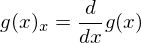

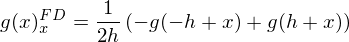

In [4]:
gx = g(x).diff(x)
gxFD = as_finite_diff(gx, stencil)
display(Eq(symbols('g(x)_x'), gx))
display(Eq(symbols('g(x)^FD_x'), together(gxFD)))

We now have that $g(x-h) = f(x-h, \theta+\pi) = f(x, \theta)$ for the first x point in the mesh (i.e. the ghost point corresponding to $f(x, \theta+\pi)$). This means that

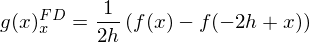

In [5]:
# The derivative first derivative of f(x) in x+h
gxFD = gxFD.subs([\
                   (g(x-h), f(x-2*h)),\
                   (g(x+h), f(x))\
                  ])
display(Eq(symbols('g(x)^FD_x'), together(gxFD)))

Further, the first derivative of $f(x)$ in $x+h$ gives

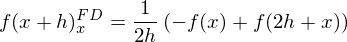

In [6]:
fxP1x = fxFD.subs([\
                   (f(x-h), f(x)),\
                   (f(x+h), f(x+2*h))\
                  ])
display(Eq(symbols('f(x+h)^FD_x'), together(fxP1x)))

Thus, the derivative of $f(x)^{FD}_x$ (i.e. $f(x)^{FD}_{xx}$) can be found by substituting $g(x)^{FD}_x$ for $f(x-h)$ and $f(x+h)^{FD}_x$ for $f(x+h)$ in $f(x)^{FD}_x$

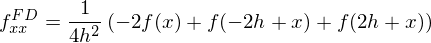

In [7]:
fxxFD = fxFD.subs([\
                   (f(x-h), gxFD),\
                   (f(x+h), fxP1x)\
                  ])

display(Eq(symbols('f^FD_xx'), together(fxxFD)))

# Calculating the order

Let's call the Taylor expansions of $f$ for $T[f(x,a)] = \sum_{n=0}^\infty\frac{f^{(n)}(a)}{n!}(x-a)^n$

In [8]:
x0 = symbols('x0')
terms = 7

Taylor expasion of $f$ expanded around $a=x_0-2h$ evaluated in $x=x_0$

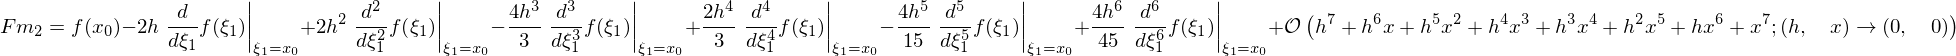

In [9]:
Fm2 = f(x-2*h).series(x-2*h, x0=x0, n=terms)
Fm2 = Fm2.subs(x-x0,0)
display(Eq(symbols('Fm2'),Fm2))

Taylor expasion of $f$ expanded around $a=x_0$ evaluated in $x=x_0$

In [10]:
F = f(x).series(x, x0=x0, n=terms)
F = F.subs(x-x0,0)
display(Eq(symbols('F'),F))

Taylor expasion of $f$ expanded around $a=x_0+2h$ evaluated in $x=x_0$

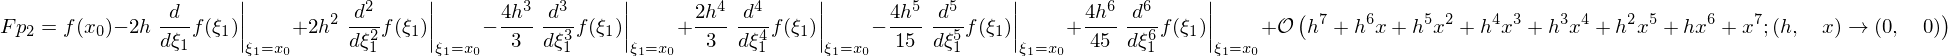

In [11]:
Fp2 = f(x+2*h).series(x+2*h, x0=x0, n=terms)
Fp2 = Fp2.subs(x-x0,0)
display(Eq(symbols('Fp2'),Fm2))

Substitute into the FD scheme

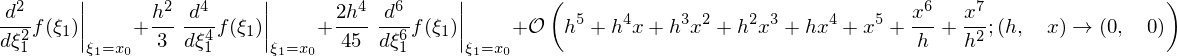

In [12]:
fxxFDT = fxxFD.subs([(f(x-2*h), Fm2),
                     (f(x)    , F   ),
                     (f(x+2*h), Fp2 ),
                    ])
display(simplify(fxxFDT))

We see that this method should be convergent to second order.